<a href="https://colab.research.google.com/github/abhi0928/Organic_Chemical_Compound_Classification_using_deeplearning/blob/master/musk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Organic Chemical Compounds Classification

In [1]:
# Importing Essential Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set_context('talk')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import regularizers

Using TensorFlow backend.


In [2]:
# Load the musk_csv file
data = pd.read_csv('/content/musk_csv.csv')
display(data.head(), data.shape)   # display an instance of dataset and get the dataset shape

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


(6598, 170)

# EDA

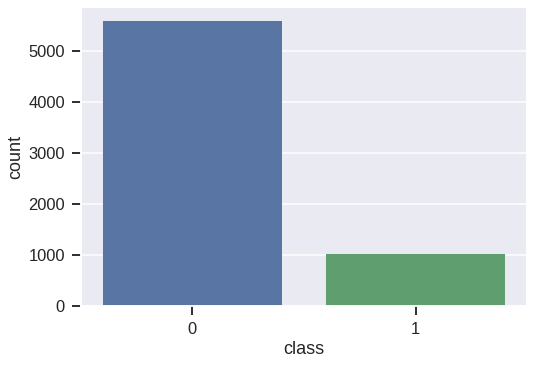

In [3]:
sns.countplot(data['class'])
plt.show()

## our data is stongly imbalanced. so we have to balanced the class labels first
## we use oversampling to balanced the data 

In [0]:
# Split the data into features and label
features = data.drop(['molecule_name', 'conformation_name', 'class'], axis = 1)
label = data['class']

In [0]:
# Standardized the data features
sc = StandardScaler()
features = sc.fit_transform(features)

## we randomly split our data into 80:20 ratio for training and validation datasets.

In [0]:
# Split data into train and test set set
X_train, X_val, y_train, y_val = train_test_split(features, label, test_size = 0.2, random_state = 42)

In [7]:
# shape of train, validate and test dataset
print(f'Shape of train data : {X_train.shape}')
print(f'Shape of validation data : {X_val.shape}')

Shape of train data : (5278, 167)
Shape of validation data : (1320, 167)


In [18]:
# OverSampling on train data to get rid of class imbalance problem
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio = 1.0, random_state = 42)
X_train, y_train = sm.fit_sample(X_train, y_train)

print(f'Shape of train data after applying sampling technique : {X_train.shape}')

Shape of train data after applying sampling technique : (8940, 167)


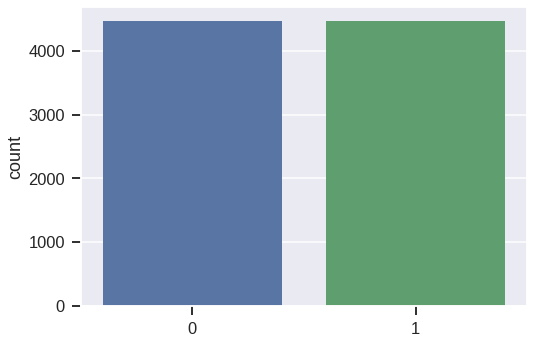

In [9]:
# lets check the label columns after applying sampling tehnique
sns.countplot(y_train)
plt.show()

## So, after applying sampling methods our we get rid of class imbalance problem

In [19]:
# Build the Multi-layer perceptron model (ANN)
model = Sequential([
                    Dense(units = 90, activation = 'relu', input_shape = (167, )),  # Input layer and First hidden layer
                    Dense(units = 30, activation = 'relu'),                         # Second hidden layer
                    Dense(units = 1, activation = 'sigmoid')                        # Output layer
])

model.summary()      # Summary of model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 90)                15120     
_________________________________________________________________
dense_5 (Dense)              (None, 30)                2730      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 31        
Total params: 17,881
Trainable params: 17,881
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile the model
model.compile(optimizer = Adam(lr = 0.0005), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [21]:
# Fit the model for train data (72% of train and 8% of validation)
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10)

Train on 8940 samples, validate on 1320 samples
Epoch 1/10
8940/8940 [==============================] - 1s 80us/step - loss: 0.2142 - acc: 0.9261 - val_loss: 0.0917 - val_acc: 0.9803
Epoch 2/10
8940/8940 [==============================] - 0s 51us/step - loss: 0.0436 - acc: 0.9923 - val_loss: 0.0248 - val_acc: 0.9962
Epoch 3/10
8940/8940 [==============================] - 0s 51us/step - loss: 0.0131 - acc: 0.9989 - val_loss: 0.0118 - val_acc: 0.9977
Epoch 4/10
8940/8940 [==============================] - 0s 48us/step - loss: 0.0051 - acc: 0.9996 - val_loss: 0.0054 - val_acc: 0.9992
Epoch 5/10
8940/8940 [==============================] - 0s 51us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0033 - val_acc: 1.0000
Epoch 6/10
8940/8940 [==============================] - 0s 50us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 7/10
8940/8940 [==============================] - 0s 49us/step - loss: 7.1686e-04 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000
Epo

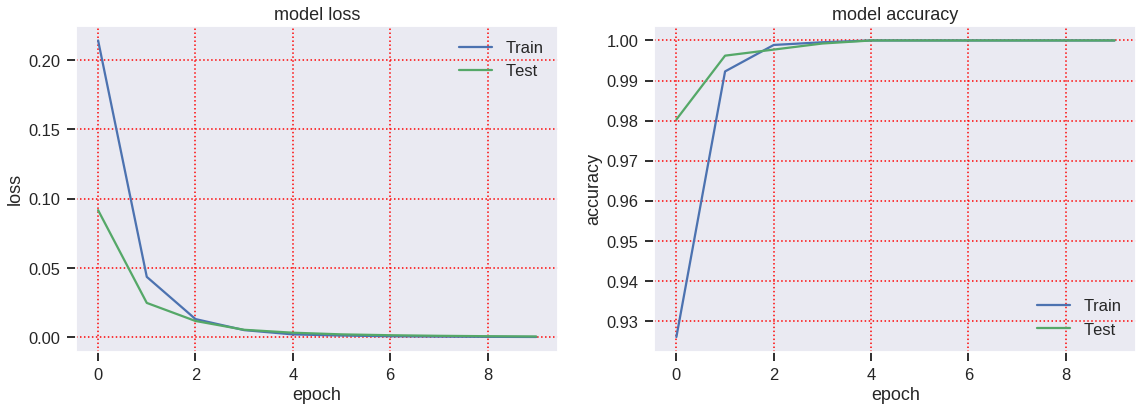

In [26]:
# Plot the model accuracy and model loss

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (19, 6))

ax1.plot(history.history['loss'], label = 'Train')
ax1.plot(history.history['val_loss'], label = 'Test')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_title('model loss')
ax1.grid(b = True, color = 'red', linestyle = 'dotted')
ax1.legend()

ax2.plot(history.history['acc'], label = 'Train')
ax2.plot(history.history['val_acc'], label = 'Test')
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.set_title('model accuracy')
ax2.grid(b = True, color = 'red', linestyle = 'dotted')
ax2.legend()


plt.show()

In [0]:
# predictions given by our model on validation data
y_pred = model.predict(X_val)
y_pred = (y_pred > 0.5)   # set a threshold of 0.5

# Final Performance of model

## Final performance of our model is check on our unseen test data (20% of complete data)

In [23]:
val_acc = accuracy_score(y_val, y_pred)    # check accuracy of model on validation data
print(f'validation accuracy of model is : {val_acc * 100} %')
print('validation loss of model is : 0.00055912')

validation accuracy of model is : 100.0 %
validation loss of model is : 0.00055912


In [24]:
# Classification report 
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1111
           1       1.00      1.00      1.00       209

    accuracy                           1.00      1320
   macro avg       1.00      1.00      1.00      1320
weighted avg       1.00      1.00      1.00      1320



## So, I got 100% accuracy on my validation data points and loss = 0.00055912
##precision = 1.0, recall = 1.0, f1-score = 1.0

In [0]:
# save the weights of the model
model.save_weights('musk.h5')